<a href="https://colab.research.google.com/github/viniciusriosfuck/dscodenation/blob/master/GoogleColab/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly

https://plotly.com/python/v3/ipython-notebooks/principal-component-analysis/


Ontem achei dois repositórios de Data Science muito bons no Github
Pra quem se interessar:

* [Cheatsheets](https://github.com/FavioVazquez/ds-cheatsheets)
* [Notebooks](https://github.com/donnemartin/data-science-ipython-notebooks)





In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

\begin{equation}
\mathbf{x^T} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} 
= \begin{pmatrix} \text{sepal length} \\ \text{sepal width} \\\text{petal length} \\ \text{petal width} \end{pmatrix}
\end{equation}

In [14]:
# from plotly.subplots import make_subplots

# fig = make_subplots(1, 4)
# for i in range(1, 5):
#     fig.add_trace(go.Scatter(x=X, y=y), 1, i)
    
# fig.update_xaxes(matches='x')
# fig.show()

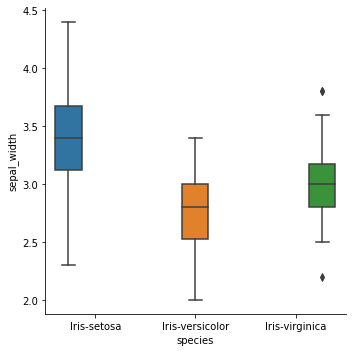

In [15]:
sns.catplot(x="species", y="sepal_width", hue="species", kind="box", data=df);

In [20]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length",
                 color="species", facet_col="species",
                 title="Sepal width x Sepal length for Iris species")
fig.update_xaxes(showgrid=False)
fig.show()



In [17]:
fig = px.scatter(df, x="petal_width", y="petal_length",
                 color="species", facet_col="species",
                 title="Petal width x Petal length for Iris species")
fig.update_xaxes(showgrid=False)
fig.show()

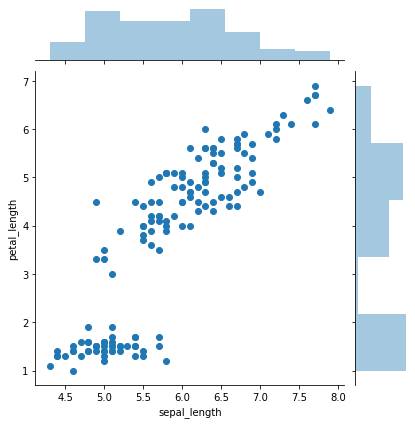

In [18]:
sns.jointplot(x="sepal_length", y="petal_length", data=df);

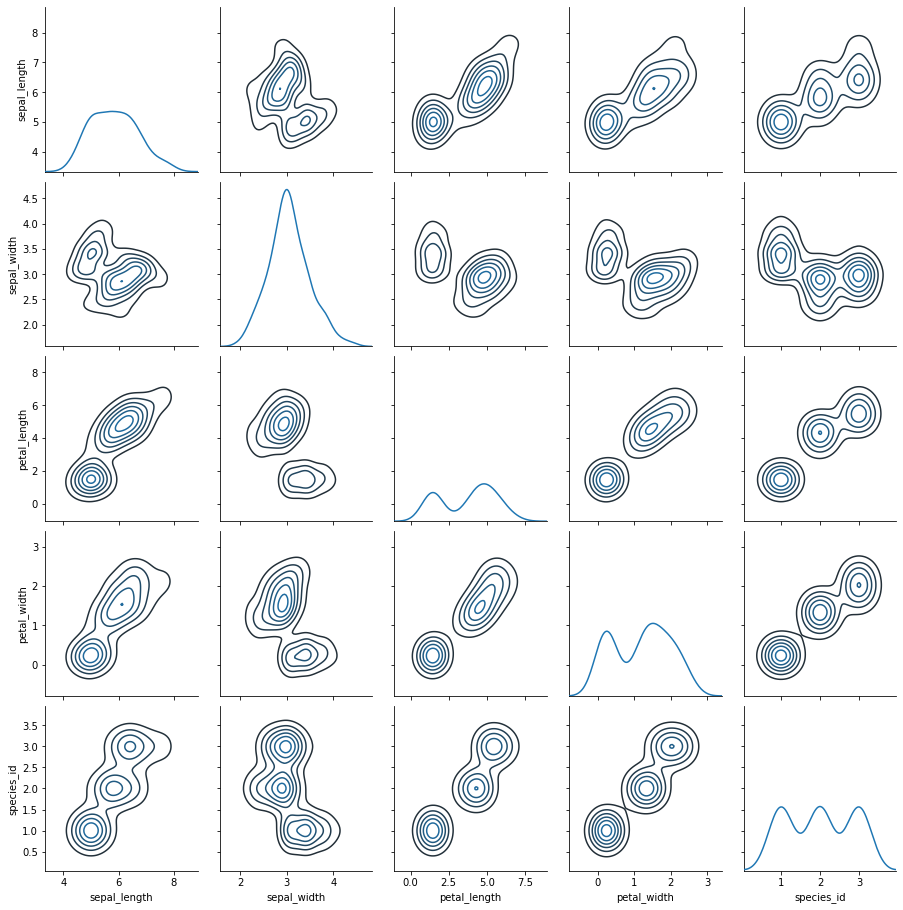

In [19]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

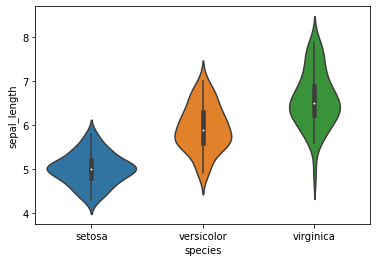

In [21]:
sns.violinplot(x=df.species, y=df.sepal_length);

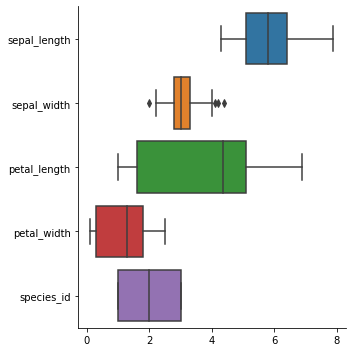

In [22]:
sns.catplot(data=df, orient="h", kind="box");

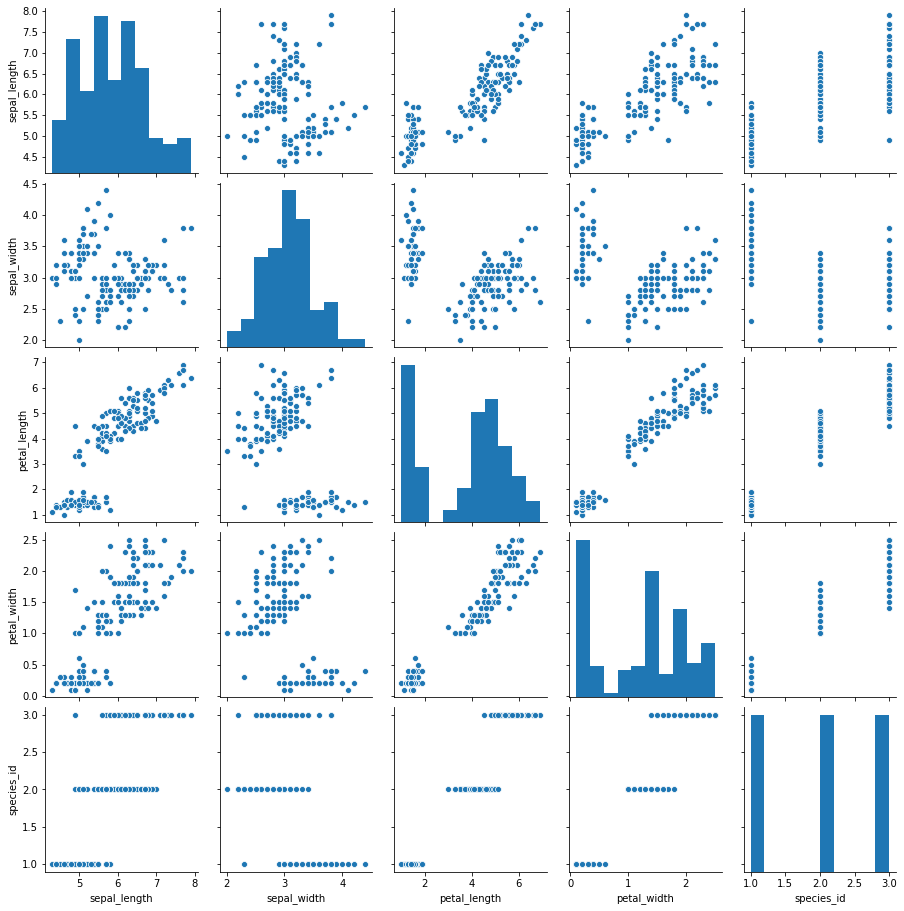

In [23]:
sns.pairplot(data=df);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



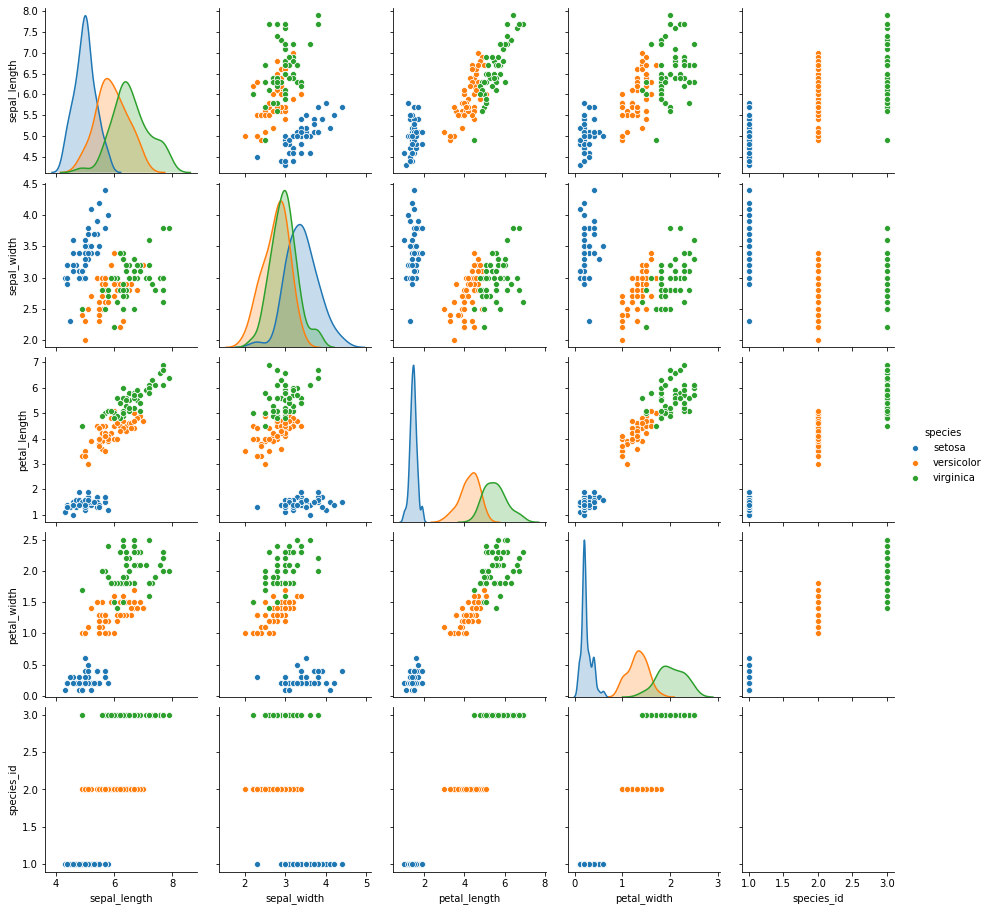

In [24]:
sns.pairplot(data=df, hue="species");

In [25]:
fig = px.histogram(df, x="sepal_width", color="species")
fig.show()

In [26]:
fig = px.scatter_matrix(df,
                        dimensions=["sepal_width", "sepal_length",
                                    "petal_width", "petal_length"],
                        color="species")
fig.show()

In [27]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

## Covariance

1D
\begin{equation}
\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right)
\end{equation}

Multidimensional
\begin{equation}
\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)
\end{equation}

In [28]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [29]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)

cov_mat0 = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat0)
eig_vals0, eig_vecs0 = np.linalg.eig(cov_mat0)

print('\nEigenvectors \n%s' %eig_vecs0)
print('\nEigenvalues \n%s' %eig_vals0)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [30]:
cov_mat1 = np.cov(X_std.T)

print('NumPy covariance matrix: \n%s' %cov_mat1)

eig_vals1, eig_vecs1 = np.linalg.eig(cov_mat1)

print('\nEigenvectors \n%s' %eig_vecs1)
print('\nEigenvalues \n%s' %eig_vals1)

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [31]:
np.allclose(eig_vals0, eig_vals1)

True

In [32]:
np.allclose(eig_vecs0, eig_vecs1)

True

In [33]:
cor_mat2 = np.corrcoef(X.T)

eig_vals2, eig_vecs2 = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs2)
print('\nEigenvalues \n%s' %eig_vals2)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [34]:
cor_mat3 = np.corrcoef(X_std.T)

eig_vals3, eig_vecs3 = np.linalg.eig(cor_mat3)

print('Eigenvectors \n%s' %eig_vecs3)
print('\nEigenvalues \n%s' %eig_vals3)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:

1. Eigendecomposition of the covariance matrix after standardizing the data.
 * pay attention to the denominator on the eigenvalue, the calculated is with $n-1$, but the equivalent to the correlation is with $n$, as can be seen below
2. Eigendecomposition of the correlation matrix.
3. Eigendecomposition of the correlation matrix after standardizing the data.

In [35]:
np.allclose(eig_vecs1, eig_vecs2)

True

In [36]:
np.allclose(eig_vecs1, eig_vecs3)

True

In [37]:
np.allclose(eig_vals1, eig_vals2)

False

In [38]:
np.allclose(eig_vals1, eig_vals3)

False

In [39]:
eig_vals1/eig_vals3

array([1.00671141, 1.00671141, 1.00671141, 1.00671141])

In [40]:
eig_vals1/eig_vals2

array([1.00671141, 1.00671141, 1.00671141, 1.00671141])

In [41]:
np.allclose(eig_vals2, eig_vals3)

True

Correction to $n$

In [43]:
cov_mat_n = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0])  # -1
print('Covariance matrix \n%s' %cov_mat_n)
eig_vals_n, eig_vecs_n = np.linalg.eig(cov_mat_n)

print('\nEigenvectors \n%s' %eig_vecs_n)
print('\nEigenvalues \n%s' %eig_vals_n)

Covariance matrix 
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [44]:
eig_vals_n/eig_vals2

array([1., 1., 1., 1.])

Singular Valor Decomposition (SVD)

In [45]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [46]:
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1) 
print('Covariance matrix \n%s' %cov_mat)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('\nEigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [47]:
for ev in eig_vecs:  # unitary eigenvectors
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [48]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [60]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [61]:
trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
pio.show(fig)

In [62]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [63]:
Y = X_std.dot(matrix_w)

In [57]:
import plotly.io as pio 

data = []

colors = {'Iris-setosa': '#0D76BF', 
          'Iris-versicolor': '#00cc96', 
          'Iris-virginica': '#EF553B'}

for name, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), colors.values()):
    trace = dict(
        type='scatter',
        x=Y[y==name,0],
        y=Y[y==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
    showlegend=True,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2')
    )
)

fig = dict(data=data, layout=layout)
pio.show(fig)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


Sklearn

OBS: PCA has inverted sign for eigenvector, reflected plots.

In [58]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [59]:
data = []

for name, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), colors.values()):

    trace = dict(
        type='scatter',
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
        xaxis=dict(title='PC1', showline=False),
        yaxis=dict(title='PC2', showline=False)
)
fig = dict(data=data, layout=layout)
pio.show(fig)

## Correlation

Pearson coeficient

\begin{equation}
r_{xy}
= \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}
{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}
= \frac{\sum_{i=1}^n x_i y_i - n \bar{x}\bar{y}}
{(n-1)s_x s_y}
= \frac{1}{n-1} \sum_{i=1}^n 
\frac{x_i - \bar{x}}{s_x}
\frac{y_i - \bar{y}}{s_y}
\end{equation}

Sample standard variance

\begin{equation}
s_{x}^2 = \frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2 \qquad
s_{y}^2 = \frac{1}{n-1}\sum_{i=1}^n(y_i-\bar{y})^2
\end{equation}

Linear algebra

In [64]:
x = np.array([1, 2, 3, 5, 8])
y = np.array([0.11, 0.12, 0.13, 0.15, 0.18])

a = np.array([0, 0, 0, 1, 1, 1, 1])
b = np.arange(7)

x * y

array([0.11, 0.24, 0.39, 0.75, 1.44])

Dot product

In [65]:
sum((x * y))

2.9299999999999997

In [66]:
np.dot(x,y)

2.9299999999999997

L2-norm

In [67]:
x * x

array([ 1,  4,  9, 25, 64])

In [68]:
np.dot(x,x)

103

In [69]:
np.dot(x,x)**0.5  # L2-norm

10.14889156509222

In [70]:
np.linalg.norm(x)  # L2-norm

10.14889156509222

Sample standard deviation

In [71]:
(1/len(a) * sum((a-a.mean())**2))**0.5

0.49487165930539345

In [72]:
a.std()

0.4948716593053935

Sample mean

In [73]:
sum(a)/len(a)

0.5714285714285714

In [74]:
a.mean()

0.5714285714285714

Cosine similarity for uncentered data

In [75]:
np.dot(x,y)/(np.linalg.norm(x) * np.linalg.norm(y))

0.9208147111895181

In [76]:
from sklearn.metrics.pairwise import cosine_similarity
float(cosine_similarity(x.reshape(1, -1),y.reshape(1, -1)))

0.9208147111895181

Cosine similarity for centered data = Pearson correlation

* Regardless if standardized or not

In [77]:
a_centered = a - a.mean()
a_centered

array([-0.57142857, -0.57142857, -0.57142857,  0.42857143,  0.42857143,
        0.42857143,  0.42857143])

In [78]:
b_centered = b - b.mean()
b_centered

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

In [79]:
float(cosine_similarity(a_centered.reshape(1, -1),b_centered.reshape(1, -1)))

0.8660254037844387

In [80]:
from sklearn.preprocessing import StandardScaler
center = StandardScaler(with_std=False)
center.fit_transform(a.reshape(-1, 1)).T.flatten()


array([-0.57142857, -0.57142857, -0.57142857,  0.42857143,  0.42857143,
        0.42857143,  0.42857143])

In [81]:
center.fit_transform(b.reshape(-1, 1)).T.flatten()

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

In [82]:
from sklearn.preprocessing import StandardScaler
standardize = StandardScaler()
standardize.fit_transform(a.reshape(-1, 1)).T.flatten()

array([-1.15470054, -1.15470054, -1.15470054,  0.8660254 ,  0.8660254 ,
        0.8660254 ,  0.8660254 ])

In [83]:
standardize.fit_transform(b.reshape(-1, 1)).T.flatten()

array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

In [84]:
a_standardized = (a - a.mean())/a.std()
a_standardized

array([-1.15470054, -1.15470054, -1.15470054,  0.8660254 ,  0.8660254 ,
        0.8660254 ,  0.8660254 ])

In [85]:
b_standardized = (b - b.mean())/b.std()
b_standardized

array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

In [86]:
float(cosine_similarity(a_standardized.reshape(1, -1),b_standardized.reshape(1, -1)))

0.8660254037844386

Note:
That give us an insight that the variance (spread) ratio doesn't affect the correlation.

The **correlation** could be interpreted as a relation between the **means**!

Rodgers and Nicewander cataloged thirteen ways of interpreting correlation:

1. Function of raw scores and means
2. Standardized covariance
3. Standardized slope of the regression line
4. Geometric mean of the two regression slopes
5. Square root of the ratio of two variances
6. Mean cross-product of standardized variables
7. Function of the angle between two standardized regression lines
8. Function of the angle between two variable vectors
9. Rescaled variance of the difference between standardized scores
10. Estimated from the balloon rule
11. Related to the bivariate ellipses of isoconcentration
12. Function of test statistics from designed experiments
13. Ratio of two means

Pearson coeficient

\begin{equation}
r_{xy}
= \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}
{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}
= \frac{\sum_{i=1}^n x_i y_i - n \bar{x}\bar{y}}
{n s_x s_y}
= \frac{1}{n} \sum_{i=1}^n 
\frac{x_i - \bar{x}}{s_x}
\frac{y_i - \bar{y}}{s_y}
\end{equation}

* There is no consensus if the second and third expressions are divided by $n$, or $n-1$

First expression
\begin{equation}
r_{xy}
= \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}
{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}
\end{equation}

In [87]:
sum((x-x.mean()) * (y-y.mean())) /  (sum((x-x.mean())**2)**0.5 * sum((y-y.mean())**2)**0.5)

1.0

In [88]:
sum((a-a.mean()) * (b-b.mean())) /  (sum((a-a.mean())**2)**0.5 * sum((b-b.mean())**2)**0.5)

0.8660254037844386

Second expression
\begin{equation}
r_{xy}
= \frac{\sum_{i=1}^n x_i y_i - n \bar{x}\bar{y}}
{n s_x s_y}
\end{equation}

In [89]:
( sum(x*y) - len(x)*x.mean()*y.mean() ) / ( len(x) * x.std() * y.std() )

0.9999999999999994

In [90]:
( sum(a*b) - len(a)*a.mean()*b.mean() ) / ( len(a) * a.std() * b.std() )

0.8660254037844387

Third expression

\begin{equation}
r_{xy}
= \frac{1}{n} \sum_{i=1}^n 
\frac{x_i - \bar{x}}{s_x}
\frac{y_i - \bar{y}}{s_y}
\end{equation}

In [91]:
1/len(x) * sum( (x-x.mean())/x.std() * (y-y.mean())/y.std() )

1.0

In [92]:
1/len(a) * sum( (a-a.mean())/a.std() * (b-b.mean())/b.std() )

0.8660254037844386

Scipy

In [93]:
 from scipy.stats import pearsonr
 pearsonr(x, y)[0]

1.0

In [94]:
pearsonr(a, b)[0]

0.8660254037844386

Expression 1 steps

In [95]:
x-x.mean()

array([-2.8, -1.8, -0.8,  1.2,  4.2])

In [96]:
y-y.mean()

array([-0.028, -0.018, -0.008,  0.012,  0.042])

In [97]:
(x-x.mean()) * (y-y.mean())

array([0.0784, 0.0324, 0.0064, 0.0144, 0.1764])

In [98]:
sum((x-x.mean()) * (y-y.mean()))

0.308

In [99]:
(x-x.mean())**2

array([ 7.84,  3.24,  0.64,  1.44, 17.64])

In [100]:
sum((x-x.mean())**2)**0.5

5.549774770204643

In [101]:
sum((y-y.mean())**2)**0.5

0.05549774770204643

In [102]:
sum((x-x.mean())**2)**0.5 * sum((y-y.mean())**2)**0.5

0.308

Second expression steps

In [103]:
sum(x*y)

2.9299999999999997

In [104]:
len(x)

5

In [105]:
x.mean()

3.8

In [106]:
y.mean()

0.13799999999999998

In [107]:
-len(x)*x.mean()*y.mean()

-2.622

In [108]:
x.std()

2.4819347291981715

In [109]:
y.std()

0.02481934729198171

In [110]:
(len(x)-1) * x.std() * y.std()

0.2464

Critical value Pearson Correlation based on t-Student distribution
\begin{equation}
t = r \sqrt{\frac{n-2}{1-r^2}}
\end{equation}

\begin{equation}
r = \frac{t}{\sqrt{n-2+t^2}}
\end{equation}

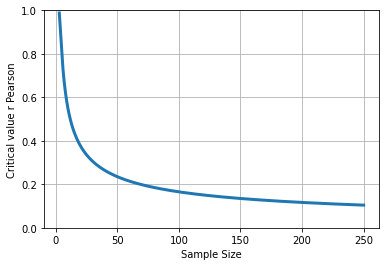

In [112]:
from scipy.stats import t
import matplotlib.pyplot as plt

n = np.linspace(2,250,250)
df = n-2
alpha = 0.05  # significance
student = t.ppf(1-alpha, df)  #/

critical_r = student / (n-2 + student**2) ** 0.5

plt.plot(n, critical_r, lw=3)
plt.grid()
plt.ylim(0,1)
plt.xlabel("Sample Size")
plt.ylabel("Critical value r Pearson");



Fisher Transformation

\begin{equation}
F(r)=\frac{1}{2}\ln\left(\frac{1+r}{1-r}\right)=\mathrm{arctanh}\;(r)
\end{equation}

\begin{equation}
F(r) \approx \mathcal{N}(\mu=F(\rho),\quad SE=\frac{1}{\sqrt{n-3}}
\end{equation}

\begin{equation}
z = \frac{x -\mu}{SE} = \left[F(r)-F(\rho_0)\right] \sqrt{n-3}
\end{equation}

Null hypothesis
* $\rho = \rho_0 $
* Sample pairs are independent and identically distributed
* Bivariate normal distribution

\begin{equation}
p_{value} = a\;\mathrm{CDF}(\mathcal{N}(-z))
\end{equation}
where $a=2$, if two-sided and  $a=1$ if one-sided

In [113]:
from scipy.stats import norm
# ex: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

r=0.3  # pearson correlation
n=50 # sample size
alpha=0.05  # 95% confidence
a=2  # two sided

# Fisher transform
fisher = np.arctanh(r)

# Check formula
print(np.allclose(fisher, 0.5*np.log((1+r)/(1-r))))
print(round(fisher,5))

# Standard error
SE=1/(n-3)**0.5

# Z-score normal distribution
z=norm.ppf(1-alpha/a)

# +- confidence interval
range_CI = z*SE

# fisher confidence interval
CI_fisher=np.array([fisher-range_CI, fisher+range_CI])
print(CI_fisher.round(7))

# pearson confidence interval
CI_r = np.tanh(CI_fisher) 
print(CI_r.round(3))

# Check p-value = alpha
p_value=a*norm.cdf(-z)
# print(round(p_value,3))
print(np.allclose(p_value,alpha))

True
0.30952
[0.0236295 0.5954097]
[0.024 0.534]
True


In [114]:
z=2.2
a=2
p_value=a*norm.cdf(-z)
round(p_value,3)

0.028

# Sklearn
Example StatQuest

       wt1   wt2  wt3  wt4   wt5  ko1  ko2  ko3  ko4  ko5
gene1  859   794  851  832   887  351  336  340  331  339
gene2  359   307  355  336   355  324  354  350  348  337
gene3   31    29   19   27    34  233  217  217  237  227
gene4   59    44   51   52    56  656  655  668  619  645
gene5  944  1011  972  927  1001  724  705  746  702  665
(100, 10)


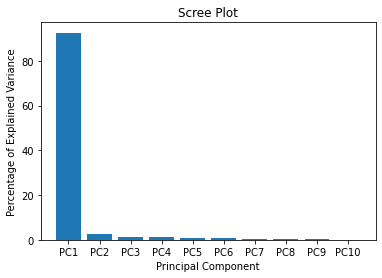

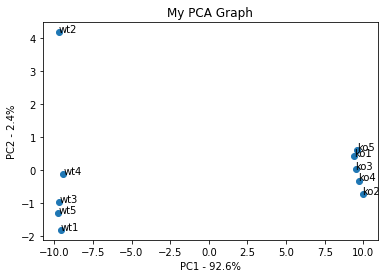

gene59   -0.103875
gene93   -0.103840
gene80   -0.103827
gene28    0.103816
gene51    0.103816
gene22   -0.103816
gene4     0.103806
gene94    0.103800
gene92   -0.103798
gene35    0.103790
dtype: float64


In [115]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
 
#########################
#
# Data Generation Code
#
#########################
## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, we'll use made up data...
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
print(data.head())
print(data.shape)
 
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data
scaled_data = preprocessing.scale(data.T)  #MSE/(n-1)
# scaled_data = StandardScaler().fit_transform(data.T)  # MSE/n
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()
 
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

Both clustered, suggesting that they are correlated with each other
* wt: left
* ko: right
Separation between the x-axis suggests that wt and ko are different

# Implementation with Numpy

Minsuk Heo
https://www.youtube.com/watch?v=xebPVQ1f7nM

Creating the dataset

In [116]:
import pandas as pd

# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch',
                           'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

# feature vectors
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
# labels
Y = df[['body_shape']]

df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


Standardize

In [117]:
from sklearn.preprocessing import StandardScaler
x_standard_scaled = StandardScaler().fit_transform(X)
x_standard_scaled

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

Covariance

In [118]:
# Covariance Matrix
import numpy as np
# features are columns from x_std
features = x_standard_scaled.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


Covariance Spectral Decomposition: Eigenvalues, Eigenvectors

In [119]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


We evaluate the importance of the first principal component

In [120]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
round((eig_vals[0] / sum(eig_vals)), 2)  # index 0: equivalent to first principal

0.73

We admitted that it corresponds to a sufficient amount to explain the variance and reduce the 5 dimensions to 1 principal equivalent component in order to clusterized our sample.

So we project all the stardardized data on this principal direction, defined by the eigenvector of the first principal component. 

In [121]:
projected_X = -x_standard_scaled.dot(eig_vecs.T[0])  # why minus?
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

Table representation

In [122]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0   # dummie to suit to seaborn plot
result['label'] = Y
result[['PC1', 'label']].head(10)

,PC1,label
0,-2.226009,Skinny
1,-0.018143,Normal
2,1.762966,Fat
3,-2.735424,Skinny
4,3.027115,Fat
5,-2.147026,Skinny
6,-0.371425,Normal
7,2.592399,Fat
8,-0.393478,Normal
9,0.509025,Fat


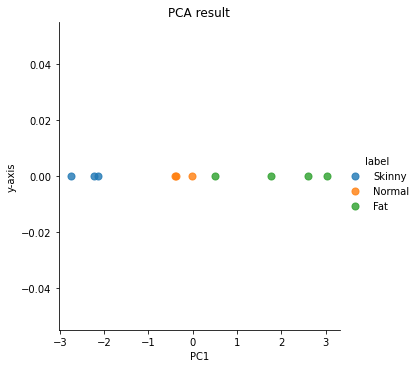

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result');

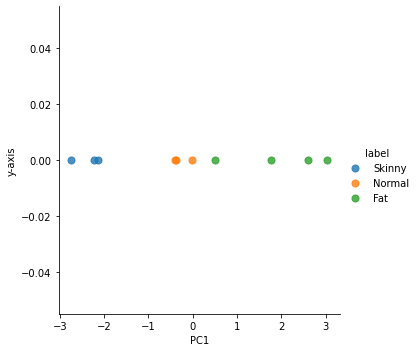

In [124]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_standard_scaled)

sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label"); # color

[-0.508005   -0.44660335]
[-0.0169937  -0.36890361]


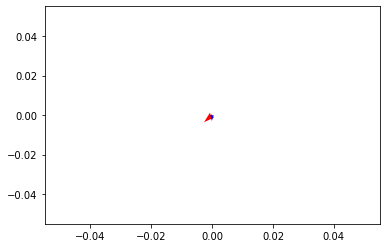

In [125]:
origin = [0, 0]

eig_vec1 = eig_vecs[:2,0]
eig_vec2 = eig_vecs[:2,1]

print(eig_vec1)
print(eig_vec2)


# This line below plots the 2d points
#plt.scatter(np_array[:,0], np_array[:,1])

plt.quiver(*origin, *eig_vec1, color=['r'], scale=21)
plt.quiver(*origin, *eig_vec2, color=['b'], scale=21)
plt.show()

[[-0.31204676 -0.95006674]
 [-0.95006674  0.31204676]]


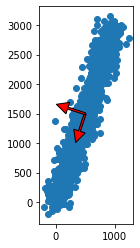

In [126]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
xTrue = np.linspace(0, 1000, N)
yTrue = 3 * xTrue
xData = xTrue + np.random.normal(0, 100, N)
yData = yTrue + np.random.normal(0, 100, N)
xData = np.reshape(xData, (N, 1))
yData = np.reshape(yData, (N, 1))
data = np.hstack((xData, yData))

mu = data.mean(axis=0)
data = data - mu
# data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()
print(eigenvectors)

fig, ax = plt.subplots()
ax.scatter(xData, yData)
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()


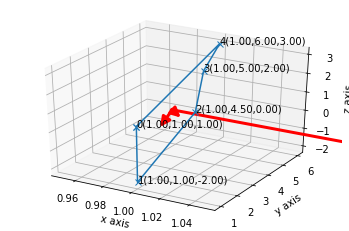

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)
##########################################################################
# here i start with drawing the actual polyhedron and the vector
##########################################################################
# generate num random points in 3d
num = 5
# coord = 10*np.random.rand(3,num)#num points in 3D #first axis is x, second = y, third = z
#xcod = np.array([1,2,3,2.7,2.4,1])
xcod = np.array([1, 1, 1, 1, 1, 1])
ycod = np.array([1, 1, 4.5, 5., 6, 1])
zcod = np.array([1, -2, 0, 2, 3, 1])
#coord = np.concatenate(coord,coord[0])
# plotting in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plotting all the points
ax.plot(xcod, ycod, zcod, 'x-')
# adding labels for vertice
for i in range(num):
    ax.text(xcod[i], ycod[i], zcod[i], '%d(%.2f,%.2f,%.2f)' %
            (i, xcod[i], ycod[i], zcod[i]))
# supposed centroid
centroid = np.array([np.mean(xcod), np.mean(ycod), np.mean(zcod)])
ax.scatter(centroid[0], centroid[1], centroid[2], marker='o', color='r')
# labelling the axes
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")
# getting a stack of all vertices, while removing last repeat vertex
cod = np.vstack(
    (np.delete(xcod, -1), np.delete(ycod, -1), np.delete(zcod, -1)))
# caculating covariance matrix
# ddof = 0 is using simple averages or normalising with N ; ddof = 1 means
# normalising with N-1
covmat = np.cov(cod, ddof=0)
# computing eigen values and eigen vectors
eigval, eigvec = LA.eig(covmat)
# multiplying eigen value and eigen vec
# for counter in range(len(eigval)):
#    eigvec[counter]= eigval[counter]*eigvec[counter]
##########################################################################
# plotting Eigen vectors
##########################################################################
for vec in eigvec.T:  # fetching one vector from list of eigvecs
    # drawing the vec, basically drawing a arrow form centroid to the end
    # point of vec
    vec += centroid
    drawvec = Arrow3D([centroid[0], vec[0]], [centroid[1], vec[1]], [centroid[2], vec[2]],
                      mutation_scale=20, lw=3, arrowstyle="-|>", color='r')
    # adding the arrow to the plot
    ax.add_artist(drawvec)
# plot show
plt.show()